In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("./dataset/pokemon.csv")

# Display the first few rows
print(df.head())


   Unnamed: 0                                          image_url  Id  \
0           0  https://img.pokemondb.net/sprites/sword-shield...   1   
1           1  https://img.pokemondb.net/sprites/sword-shield...   2   
2           2  https://img.pokemondb.net/sprites/sword-shield...   3   
3           3  https://img.pokemondb.net/sprites/sword-shield...   3   
4           4  https://img.pokemondb.net/sprites/sword-shield...   4   

                    Names  Type1   Type2  Total  HP  Attack  Defense  Sp. Atk  \
0               Bulbasaur  Grass  Poison    318  45      49       49       65   
1                 Ivysaur  Grass  Poison    405  60      62       63       80   
2                Venusaur  Grass  Poison    525  80      82       83      100   
3  Venusaur Mega Venusaur  Grass  Poison    625  80     100      123      122   
4              Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  
0       65     45  
1       80     60  
2      100     80  


In [9]:
# Check the dimensions of the dataset
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (1194, 13)


In [10]:
# Summary statistics
print(df.describe())

        Unnamed: 0           Id        Total           HP       Attack  \
count  1194.000000  1194.000000  1194.000000  1194.000000  1194.000000   
mean    596.500000   492.746231   441.206868    70.883585    80.948911   
std     344.822418   293.719541   121.015326    26.861740    32.126164   
min       0.000000     1.000000   175.000000     1.000000     5.000000   
25%     298.250000   235.250000   330.000000    52.000000    56.000000   
50%     596.500000   486.500000   460.500000    70.000000    80.000000   
75%     894.750000   741.750000   520.000000    85.000000   100.000000   
max    1193.000000  1010.000000  1125.000000   255.000000   190.000000   

           Defense      Sp. Atk      Sp. Def        Speed  
count  1194.000000  1194.000000  1194.000000  1194.000000  
mean     74.587102    72.881072    72.123953    69.782245  
std      30.678626    32.702411    27.628412    30.200828  
min       5.000000    10.000000    20.000000     5.000000  
25%      51.250000    50.000000  

In [11]:
# Check the data types of each column
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1194 non-null   int64 
 1   image_url   1194 non-null   object
 2   Id          1194 non-null   int64 
 3   Names       1194 non-null   object
 4   Type1       1194 non-null   object
 5   Type2       652 non-null    object
 6   Total       1194 non-null   int64 
 7   HP          1194 non-null   int64 
 8   Attack      1194 non-null   int64 
 9   Defense     1194 non-null   int64 
 10  Sp. Atk     1194 non-null   int64 
 11  Sp. Def     1194 non-null   int64 
 12  Speed       1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB
None


In [12]:
# Checking for missing values
print(df.isnull().sum())

Unnamed: 0      0
image_url       0
Id              0
Names           0
Type1           0
Type2         542
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64


In [14]:
total_pokemon = len(df)
print("Total number of Pokémon:", total_pokemon)

Total number of Pokémon: 1194


In [19]:
# Count the frequency of each type
type1_counts = df['Type1'].value_counts()
type2_counts = df['Type2'].value_counts()

# Display the types and their frequencies
print("Primary Types of Pokémon:")
print(type1_counts)

print("\nSecondary Types of Pokémon:")
print(type2_counts)

Primary Types of Pokémon:
Type1
Water       150
Normal      131
Grass       105
Bug          91
Psychic      82
Fire         75
Electric     73
Rock         67
Dark         56
Fighting     50
Dragon       49
Ghost        47
Ground       46
Poison       45
Ice          43
Steel        43
Fairy        31
Flying       10
Name: count, dtype: int64

Secondary Types of Pokémon:
Type2
Flying      122
Psychic      49
Poison       47
Ground       43
Fairy        42
Fighting     41
Steel        40
Dragon       39
Ghost        37
Grass        33
Dark         33
Water        25
Ice          22
Fire         20
Rock         19
Normal       18
Electric     13
Bug           9
Name: count, dtype: int64


In [18]:
# Print the column names
print(df.columns)

Index(['Unnamed: 0', 'image_url', 'Id', 'Names', 'Type1', 'Type2', 'Total',
       'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')


In [20]:
# Calculate descriptive statistics for base stats
base_stats = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
stats_summary = base_stats.describe()

# Display the summary statistics
print("Summary Statistics for Base Stats:")
print(stats_summary)

Summary Statistics for Base Stats:
                HP       Attack      Defense      Sp. Atk      Sp. Def  \
count  1194.000000  1194.000000  1194.000000  1194.000000  1194.000000   
mean     70.883585    80.948911    74.587102    72.881072    72.123953   
std      26.861740    32.126164    30.678626    32.702411    27.628412   
min       1.000000     5.000000     5.000000    10.000000    20.000000   
25%      52.000000    56.000000    51.250000    50.000000    50.000000   
50%      70.000000    80.000000    70.000000    65.000000    70.000000   
75%      85.000000   100.000000    90.000000    95.000000    90.000000   
max     255.000000   190.000000   250.000000   194.000000   250.000000   

             Speed  
count  1194.000000  
mean     69.782245  
std      30.200828  
min       5.000000  
25%      45.000000  
50%      67.500000  
75%      90.750000  
max     200.000000  


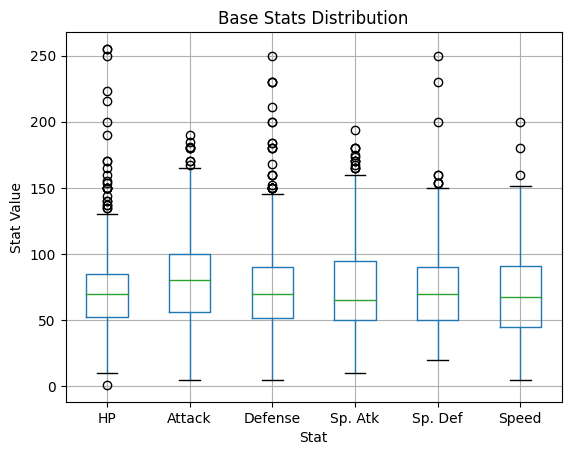

In [21]:
# Create box plots for each base stat
base_stats.boxplot()
plt.title('Base Stats Distribution')
plt.ylabel('Stat Value')
plt.xlabel('Stat')
plt.show()

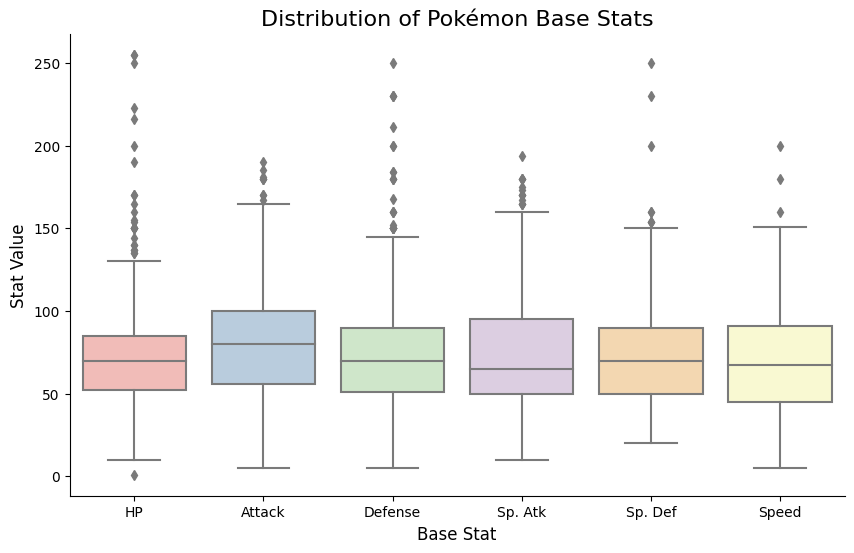

In [22]:
# Create a figure with a larger size
plt.figure(figsize=(10, 6))

# Customize the box plot
sns.boxplot(data=base_stats, palette='Pastel1')

# Add title and axis labels
plt.title('Distribution of Pokémon Base Stats', fontsize=16)
plt.xlabel('Base Stat', fontsize=12)
plt.ylabel('Stat Value', fontsize=12)

# Customize the tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

In [24]:
# Calculate z-scores for each base stat
z_scores = (base_stats - base_stats.mean()) / base_stats.std()

# Set the threshold for high and low base stats
threshold = 2

# Identify Pokémon with exceptionally high or low base stats
high_stats = df[z_scores > threshold]
low_stats = df[z_scores < -threshold]

# Print Pokémon with high base stats
print("Pokémon with Exceptionally High Base Stats:")
print(high_stats)

# Print Pokémon with low base stats
print("\nPokémon with Exceptionally Low Base Stats:")
print(low_stats)

Pokémon with Exceptionally High Base Stats:
      Unnamed: 0 image_url  Id Names Type1 Type2  Total  HP  Attack  Defense  \
0            NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
1            NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
2            NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
3            NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
4            NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
...          ...       ...  ..   ...   ...   ...    ...  ..     ...      ...   
1189         NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
1190         NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
1191         NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
1192         NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN   
1193         NaN       NaN NaN   NaN   NaN   NaN    NaN NaN     NaN      NaN

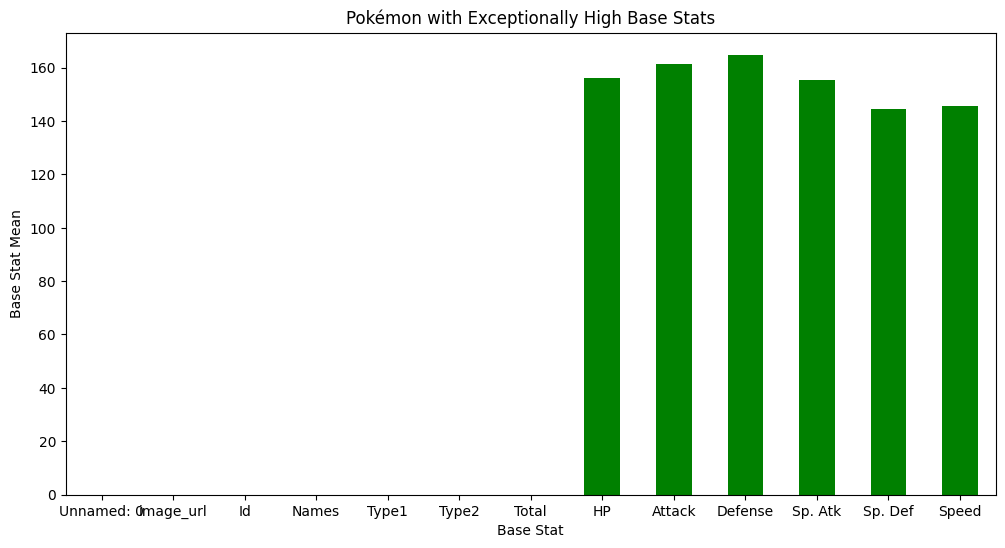

In [25]:
# Visualize Pokémon with high base stats
plt.figure(figsize=(12, 6))
plt.title('Pokémon with Exceptionally High Base Stats')
high_stats.mean().plot(kind='bar', color='green')
plt.ylabel('Base Stat Mean')
plt.xlabel('Base Stat')
plt.xticks(rotation=0)
plt.show()

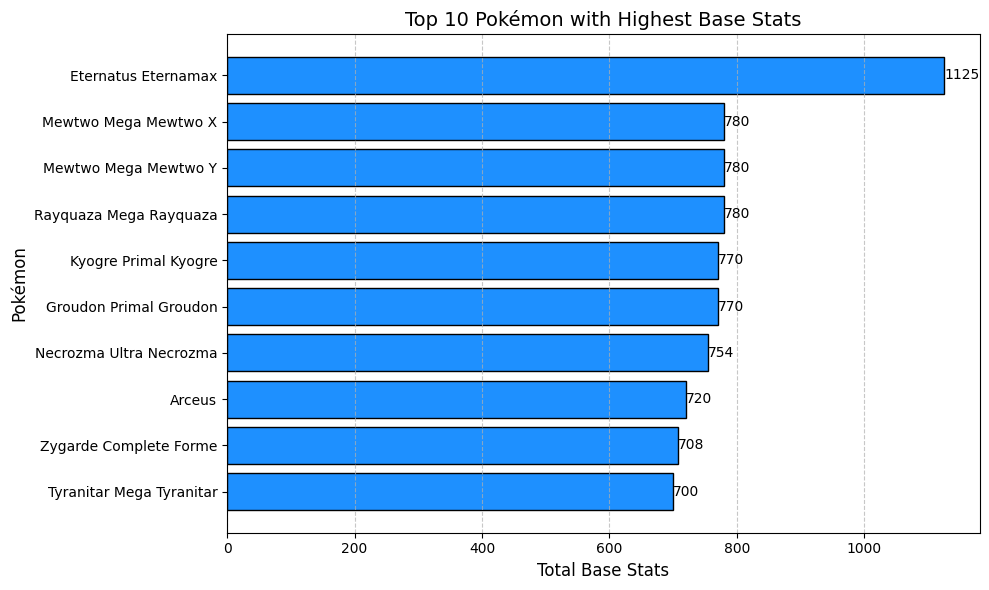

In [68]:
# Sorting the DataFrame to get the top 10 Pokémon with highest total base stats
top_pokemon = df.nlargest(10, 'Total')

# Creating the bar plot for the top 10 Pokémon with their names and total base stats
plt.figure(figsize=(10, 6))
plt.barh(top_pokemon['Names'], top_pokemon['Total'], color='dodgerblue', edgecolor='black')
plt.xlabel('Total Base Stats', fontsize=12)
plt.ylabel('Pokémon', fontsize=12)
plt.title('Top 10 Pokémon with Highest Base Stats', fontsize=14)

# Customizing the tick parameters
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gca().invert_yaxis()

# Adding background grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding values to the bars
for index, value in enumerate(top_pokemon['Total']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

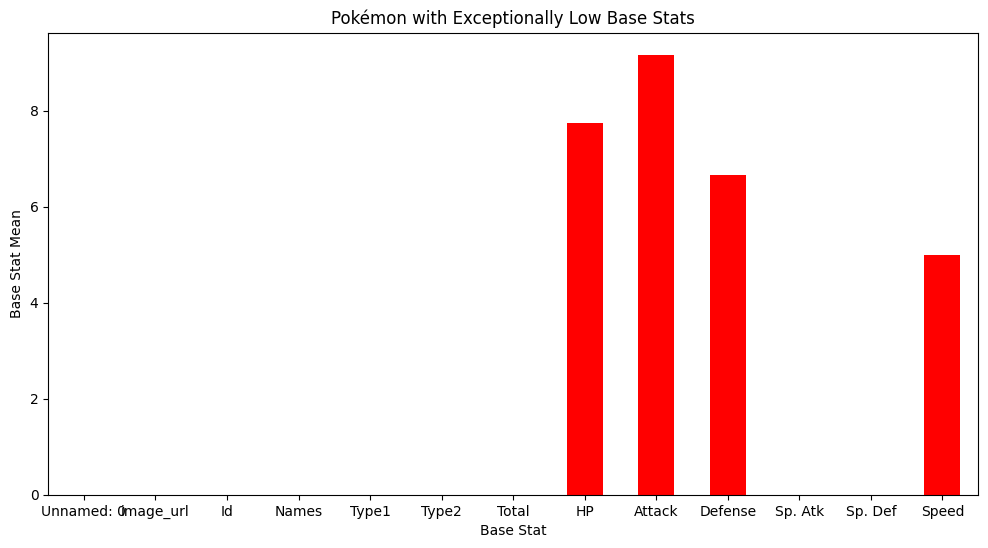

In [26]:
# Visualize Pokémon with low base stats
plt.figure(figsize=(12, 6))
plt.title('Pokémon with Exceptionally Low Base Stats')
low_stats.mean().plot(kind='bar', color='red')
plt.ylabel('Base Stat Mean')
plt.xlabel('Base Stat')
plt.xticks(rotation=0)
plt.show()









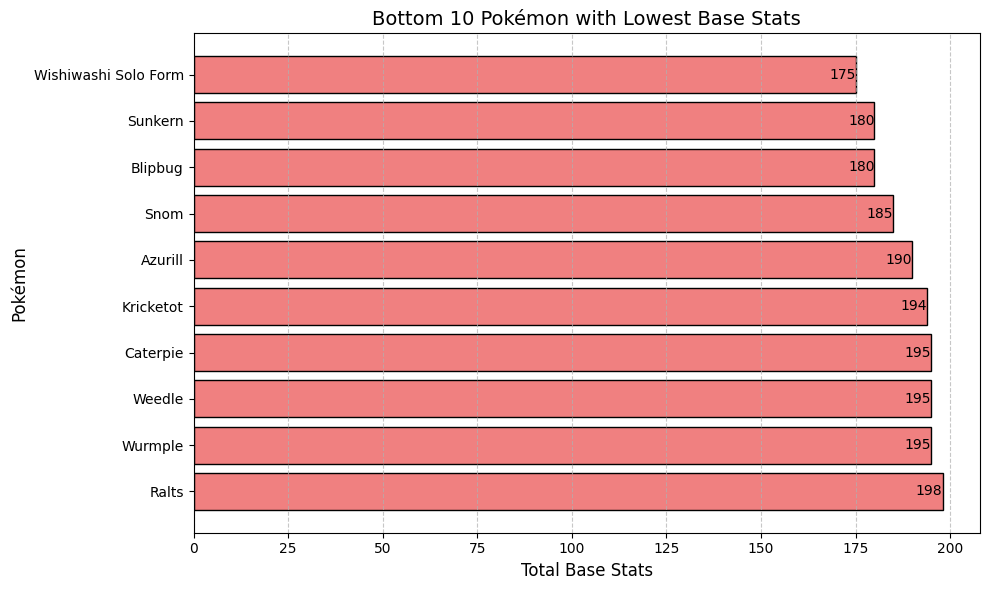

In [69]:
# Sorting the DataFrame to get the bottom 10 Pokémon with the lowest total base stats
bottom_pokemon = df.nsmallest(10, 'Total')

# Creating the bar plot for the bottom 10 Pokémon with their names and total base stats
plt.figure(figsize=(10, 6))
plt.barh(bottom_pokemon['Names'], bottom_pokemon['Total'], color='lightcoral', edgecolor='black')
plt.xlabel('Total Base Stats', fontsize=12)
plt.ylabel('Pokémon', fontsize=12)
plt.title('Bottom 10 Pokémon with Lowest Base Stats', fontsize=14)

# Customizing the tick parameters
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gca().invert_yaxis()

# Adding background grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding values to the bars
for index, value in enumerate(bottom_pokemon['Total']):
    plt.text(value, index, str(value), ha='right', va='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

In [30]:
# Calculate the total base stat for each Pokémon
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# Sort the dataset based on total base stats
sorted_pokemon = df.sort_values('Total', ascending=False)

# Identify the Pokémon with the greatest strengths
greatest_strengths = sorted_pokemon.head(10)

# Identify the Pokémon with the weakest strengths
weakest_strengths = sorted_pokemon.tail(10)

# Print Pokémon with the greatest strengths
print("Pokémon with the Greatest Strengths:")
print(greatest_strengths[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

# Print Pokémon with the weakest strengths
print("\nPokémon with the Weakest Strengths:")
print(weakest_strengths[[ 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

Pokémon with the Greatest Strengths:
      Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
1058   1125  255     115      250      125      250    130
201     780  106     190      100      154      100    130
202     780  106     150       70      194      120    140
475     780  105     180      100      180      100    115
473     770  100     180      160      150       90     90
471     770  100     150       90      180      160     90
961     754   97     167       97      167       97    129
605     720  120     120      120      120      120    120
865     708  216     100      121       91       95     85
469     700   80     130      100      160      120    110

Pokémon with the Weakest Strengths:
      Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
349     198  28      25       25       45       35     40
334     195  45      45       35       20       30     20
16      195  40      35       30       20       20     50
13      195  45      30       35       20    

In [33]:
# Group the data by type combinations (type 1 and type 2) and calculate the sum of total base stats
type_strengths = df.groupby(['Type1', 'Type2'])['Total'].sum().reset_index()

# Sort the data based on total base stats in descending order
sorted_strengths = type_strengths.sort_values('Total', ascending=False)

# Print the Pokémon type combinations with the greatest overall strength
print("Pokémon Type Combinations with the Greatest Overall Strength:")
print(sorted_strengths.head(10))

Pokémon Type Combinations with the Greatest Overall Strength:
        Type1   Type2  Total
133    Normal  Flying  11770
105     Grass  Poison   6211
5         Bug  Flying   5913
92      Ghost   Grass   4616
194     Water  Ground   4339
155   Psychic  Flying   4274
9         Bug  Poison   4185
186     Water    Dark   4131
152   Psychic   Fairy   3962
44   Electric  Flying   3934


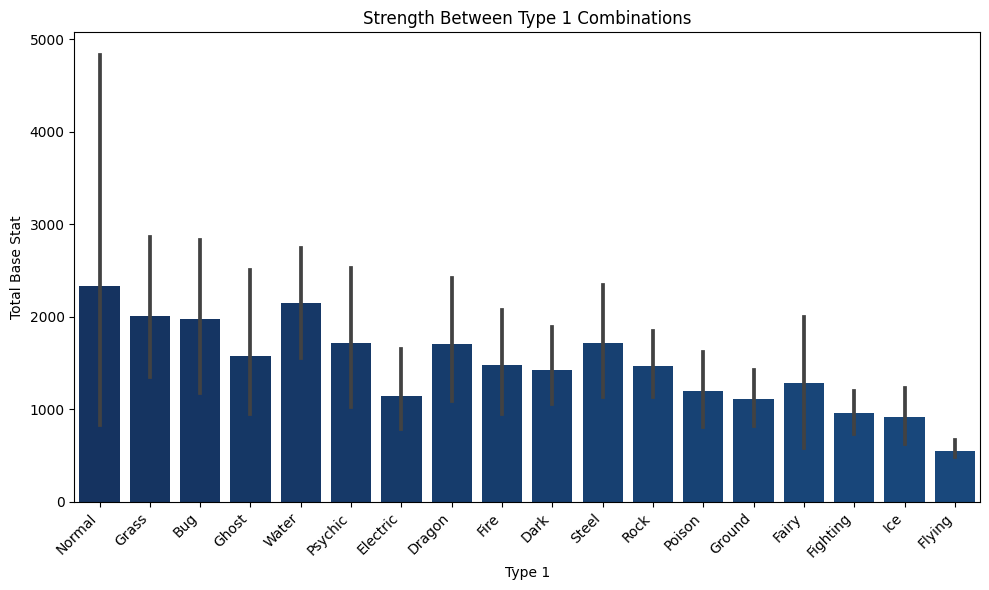

In [35]:
# Set the color palette
colors = sns.color_palette('Blues_r', n_colors=len(sorted_strengths))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type1', y='Total', data=sorted_strengths, palette=colors)
plt.title('Strength Between Type 1 Combinations')
plt.xlabel('Type 1')
plt.ylabel('Total Base Stat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

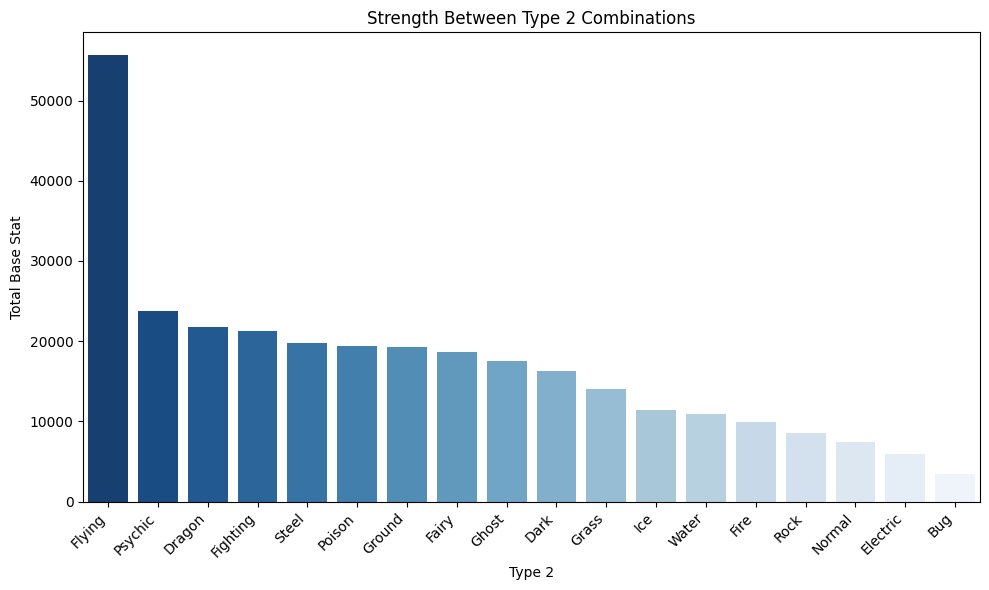

In [66]:
# Set the color palette
colors = sns.color_palette('Blues_r', n_colors=len(sorted_strengths))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type2', y='Total', data=sorted_strengths, palette=colors)
plt.title('Strength Between Type 2 Combinations')
plt.xlabel('Type 2')
plt.ylabel('Total Base Stat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
# Group the data by Type 1 and calculate the sum of total base stats
type_strengths = df.groupby('Type1')['Total'].sum().reset_index()

# Sort the data based on total base stats in descending order
sorted_strengths = type_strengths.sort_values('Total', ascending=False)

# Get the top 5 Type 1 combinations with the greatest overall strength
top_5_strengths = sorted_strengths.head(5)

# Print the top 5 Type 1 combinations with the greatest overall strength
print("Top 5 Type 1 Combinations with the Greatest Overall Strength:")
print(top_5_strengths)

Top 5 Type 1 Combinations with the Greatest Overall Strength:
      Type1  Total
17    Water  65521
12   Normal  53630
9     Grass  44149
14  Psychic  39885
0       Bug  34686


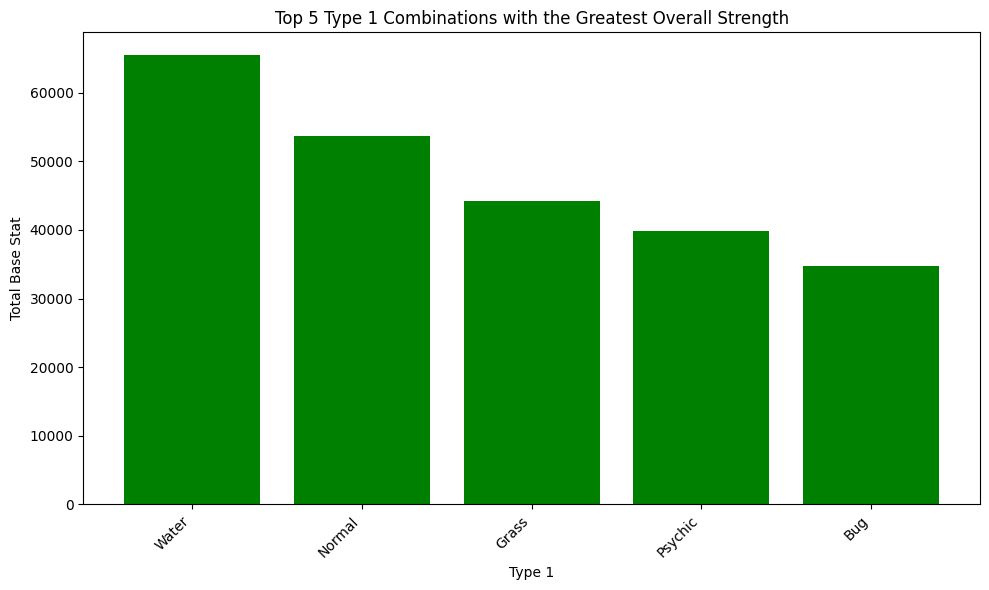

In [38]:
# Visualize the top 5 Type 1 combinations with the greatest overall strength
plt.figure(figsize=(10, 6))
plt.bar(top_5_strengths['Type1'], top_5_strengths['Total'], color='green')
plt.title('Top 5 Type 1 Combinations with the Greatest Overall Strength')
plt.xlabel('Type 1')
plt.ylabel('Total Base Stat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Group the data by Type 2 and calculate the sum of total base stats
type_strengths = df.groupby('Type2')['Total'].sum().reset_index()

# Sort the data based on total base stats in descending order
sorted_strengths = type_strengths.sort_values('Total', ascending=False)

# Get the top 5 Type 2 Pokémon with the greatest overall strength
top_5_strengths = sorted_strengths.head(5)

# Print the top 5 Type 2 Pokémon with the greatest overall strength
print("Top 5 Type 2 Pokémon with the Greatest Overall Strength:")
print(top_5_strengths)

Top 5 Type 2 Pokémon with the Greatest Overall Strength:
       Type2  Total
7     Flying  55724
14   Psychic  23787
2     Dragon  21767
5   Fighting  21282
16     Steel  19719


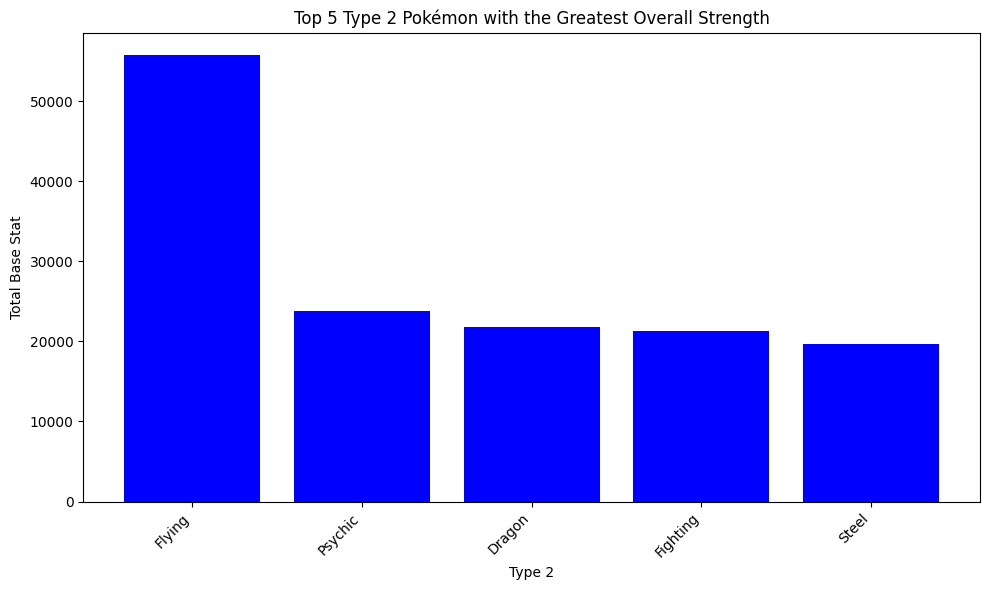

In [41]:
# Visualize the top 5 Type 2 Pokémon with the greatest overall strength
plt.figure(figsize=(10, 6))
plt.bar(top_5_strengths['Type2'], top_5_strengths['Total'], color='blue')
plt.title('Top 5 Type 2 Pokémon with the Greatest Overall Strength')
plt.xlabel('Type 2')
plt.ylabel('Total Base Stat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:

# Calculate the total strength for Type 1
total_strength_type1 = type1_strengths['Total'].sum()

# Calculate the total strength for Type 2
total_strength_type2 = type2_strengths['Total'].sum()

# Determine which type has the greatest overall strength
if total_strength_type1 > total_strength_type2:
    greatest_strength_type = 'Type 1'
    greatest_strength_total = total_strength_type1
elif total_strength_type2 > total_strength_type1:
    greatest_strength_type = 'Type 2'
    greatest_strength_total = total_strength_type2
else:
    greatest_strength_type = 'Type 1 and Type 2'
    greatest_strength_total = total_strength_type1
    
    
# Find the Pokémon with the greatest overall strength
pokemon_greatest_strength = df.loc[df['Total'].idxmax()]


# Print the result
print(f"The type with the greatest overall strength is {greatest_strength_type} with a total base stat of {greatest_strength_total}.")
print(f"The Pokémon with the greatest overall strength is {pokemon_greatest_strength['Names']} with a total base stat of {pokemon_greatest_strength['Total']}.")

The type with the greatest overall strength is Type 1 with a total base stat of 526801.
The Pokémon with the greatest overall strength is Eternatus Eternamax with a total base stat of 1125.


In [55]:
# Search for Eternatus Eternamax
eternatus_eternamax = df[df['Names'] == 'Eternatus Eternamax']

# Print the details of Eternatus Eternamax
print("Details of Eternatus Eternamax:")
print(eternatus_eternamax)

Details of Eternatus Eternamax:
      Unnamed: 0                                          image_url   Id  \
1058        1058  https://img.pokemondb.net/sprites/sword-shield...  890   

                    Names   Type1   Type2  Total   HP  Attack  Defense  \
1058  Eternatus Eternamax  Poison  Dragon   1125  255     115      250   

      Sp. Atk  Sp. Def  Speed  
1058      125      250    130  


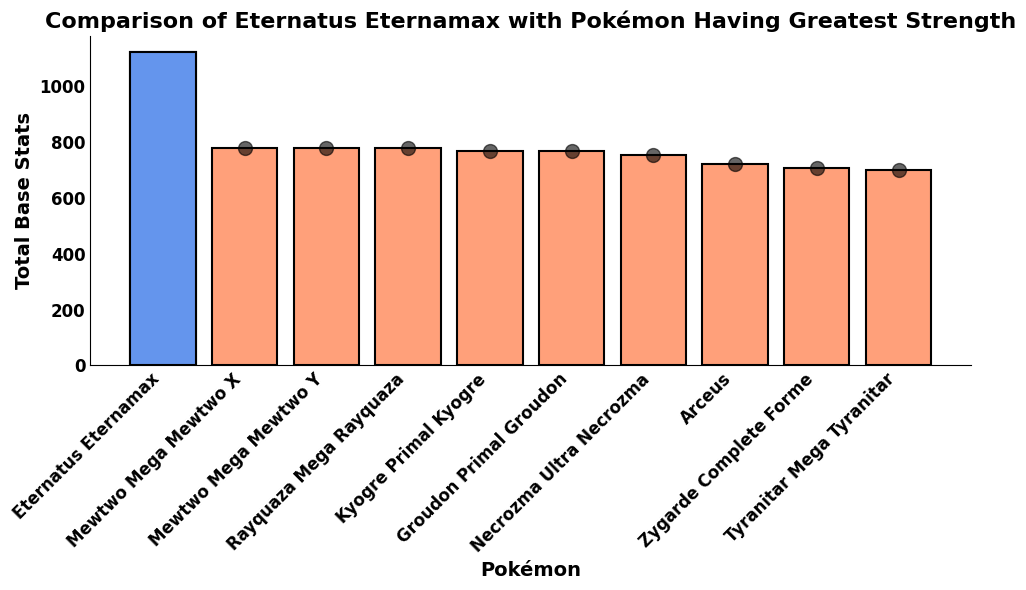

In [86]:
eternatus_eternamax_stats = df[df['Names'] == 'Eternatus Eternamax'][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values[0]
eternatus_eternamax_total = eternatus_eternamax_stats.sum()

# Get the top Pokémon with the highest overall strength
top_pokemon_names = top_pokemon['Names'].tolist()
top_pokemon_totals = top_pokemon['Total'].tolist()

# Combine Eternatus Eternamax stats and top Pokémon stats
names = ['Eternatus Eternamax'] + top_pokemon_names
totals = [eternatus_eternamax_total] + top_pokemon_totals

# Create a custom color palette for the bar plot
colors = ['cornflowerblue' if name == 'Eternatus Eternamax' else 'lightsalmon' for name in names]

# Create the bar plot with artistic styling
plt.figure(figsize=(10, 6))
plt.bar(names, totals, color=colors, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlabel('Pokémon', fontsize=14, fontweight='bold')
plt.ylabel('Total Base Stats', fontsize=14, fontweight='bold')
plt.title('Comparison of Eternatus Eternamax with Pokémon Having Greatest Strength', fontsize=16, fontweight='bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)  # Hide tick marks

# Add abstract circles to the bars
for i, total in enumerate(totals):
    if names[i] == 'Eternatus Eternamax':
        continue
    plt.scatter(names[i], total, s=100, c='black', alpha=0.6, zorder=10)

# Display the plot
plt.tight_layout()
plt.show()
